# Pauta Control Aprendizaje No Supervisado

*Al finalizar, subir el notebook desarrollado a siveducMD*

Considere los datos adjuntos provenientes de una muestra de canciones de spotify, recolectadas por kaggle.com, que incluye para cada canción 11 características (columnas 4 a la 14). Se trata de analizar si tales características permiten agrupar las canciones según género.  

Entre las características disponibles hay algunas que son calculadas por el propio algoritmo de Spotify, y por lo tanto, tienen cierto grado de subjetividad, como son: **acousticness, danceability, energy, instrumentalness, liveness, speechiness y valence**. 

Por otra parte hay otras variables objetivas como **duration_ms, tempo y  loudness**. Son atributos de una canción que no están sujetos a interpretación del algoritmo. Por ejemplo, la duración es la que tenga la pista y el tempo será el que determine un metrónomo.

Por último se consigna la variable **popularity**, cuyo valor  está basado en datos reales de reproducción, pero ponderada por la cercanía en el tiempo (reproducciones más recientes tienen mayor peso a la hora de calcular la popularidad).

En este control se trata de determinar si las características aquí descritas permiten agrupar adecuadamente las canciones de acuerdo al género a la que pertenecen (primera columna de los datos).


In [46]:
library(ggplot2)
datos <-read.csv("tiposMusica.csv",dec=",",sep=";",header=TRUE)
table(datos[,1])
print(datos[1:10,])


 Classical Electronic       Rock 
        56         39         39 

       genre             artist_name
1  Classical Wolfgang Amadeus Mozart
2  Classical Wolfgang Amadeus Mozart
3  Classical Wolfgang Amadeus Mozart
4  Classical         Frederic Chopin
5  Classical         Frederic Chopin
6  Classical         Frederic Chopin
7  Classical    Ludwig van Beethoven
8  Classical    Ludwig van Beethoven
9  Classical   Johann Sebastian Bach
10 Classical   Johann Sebastian Bach
                                                                    track_name
1                                 Grabmusik, K, 42: III, Geliebte Seel' (Live)
2          Requiem in D Minor, K, 626: IIIb, Sequence No, 2, Tuba mirum (Live)
3                                   12 Duets (No, 10 Andante) - Violin Version
4                                      Mazurkas, Op, 50: No, 2 in A-Flat Major
5                     M\x82lodies Polonaises, Op, 74: No, 9, Melodia (Lamento)
6                           Preludes, Op, 28: No, 12 in G-Sharp Minor (Presto)
7                   Fidelio, Op, 72, Act

**Pregunta 1. (2 puntos)** 

**(i)** Realice un análisis exploratorio de los datos de las 11 características de las canciones (columnas 4 a la 14), incluyendo resúmenes de cada variable, boxplots, correlaciones y  análisis de componentes principales (PCA). 

**(ii)** Interprete sus resultados en la pregunta 1. Indique cual es el interés de utilizar PCA en este conjunto de datos. ¿Es necesario realizar alguna acción de limpieza en los datos antes de continuar con su análisis?

**Respuesta Pregunta 1**

   popularity     acousticness       danceability      duration_s     
 Min.   : 0.00   Min.   :0.000051   Min.   :0.0685   Min.   :  31.79  
 1st Qu.:30.00   1st Qu.:0.078275   1st Qu.:0.2885   1st Qu.: 148.84  
 Median :42.50   Median :0.713500   Median :0.3810   Median : 210.41  
 Mean   :40.68   Mean   :0.572186   Mean   :0.4037   Mean   : 222.05  
 3rd Qu.:54.00   3rd Qu.:0.982750   3rd Qu.:0.5115   3rd Qu.: 261.64  
 Max.   :74.00   Max.   :0.996000   Max.   :0.8650   Max.   :1822.64  
     energy        instrumentalness      liveness          loudness      
 Min.   :0.00211   Min.   :0.000000   Min.   :0.05440   Min.   :-46.122  
 1st Qu.:0.08640   1st Qu.:0.002295   1st Qu.:0.09913   1st Qu.:-23.205  
 Median :0.32900   Median :0.392000   Median :0.11450   Median :-13.286  
 Mean   :0.38042   Mean   :0.443487   Mean   :0.17520   Mean   :-16.403  
 3rd Qu.:0.64625   3rd Qu.:0.893000   3rd Qu.:0.16450   3rd Qu.: -8.533  
 Max.   :0.97700   Max.   :0.958000   Max.   :0.86300   Max

[1] 134  11

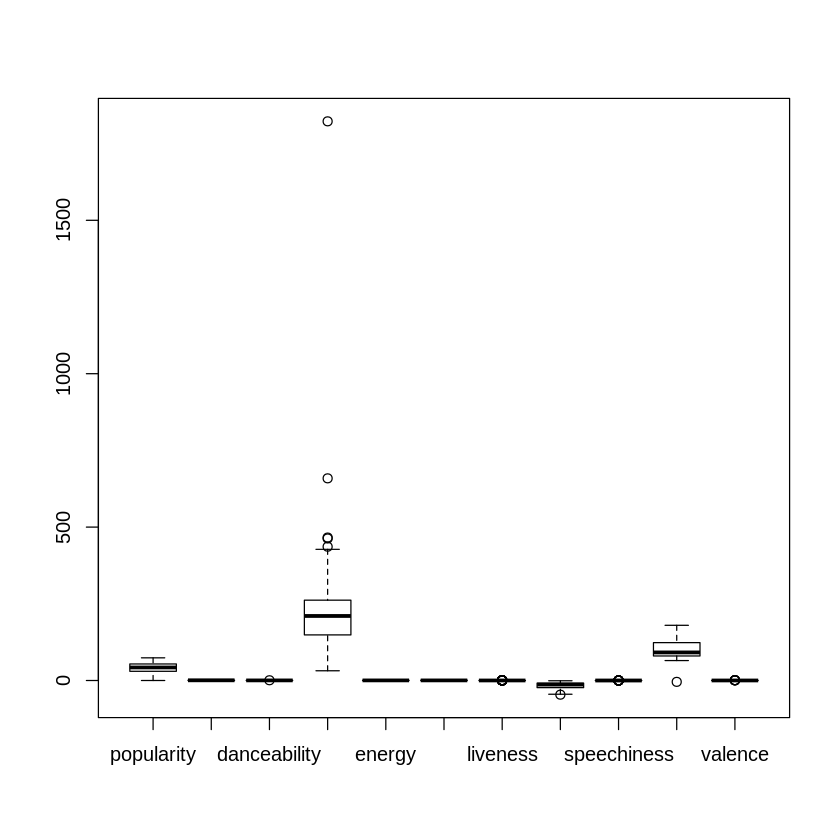

In [47]:
datos0 <- datos[,1]
datos<- datos[,4:14]
summary(datos)
boxplot(datos)
dim(datos)

Importance of components:
                            Comp.1      Comp.2       Comp.3      Comp.4
Standard deviation     172.4125466 28.23336900 17.289944623 9.840360724
Proportion of Variance   0.9614089  0.02578077  0.009668467 0.003131789
Cumulative Proportion    0.9614089  0.98718965  0.996858121 0.999989909
                             Comp.5       Comp.6       Comp.7       Comp.8
Standard deviation     3.445829e-01 2.952651e-01 2.223610e-01 1.654804e-01
Proportion of Variance 3.840236e-06 2.819646e-06 1.599145e-06 8.856524e-07
Cumulative Proportion  9.999937e-01 9.999966e-01 9.999982e-01 9.999991e-01
                             Comp.9      Comp.10      Comp.11
Standard deviation     1.278178e-01 1.104249e-01 2.670477e-02
Proportion of Variance 5.283882e-07 3.943705e-07 2.306471e-08
Cumulative Proportion  9.999996e-01 1.000000e+00 1.000000e+00

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, y[, 1L] * 0.8,

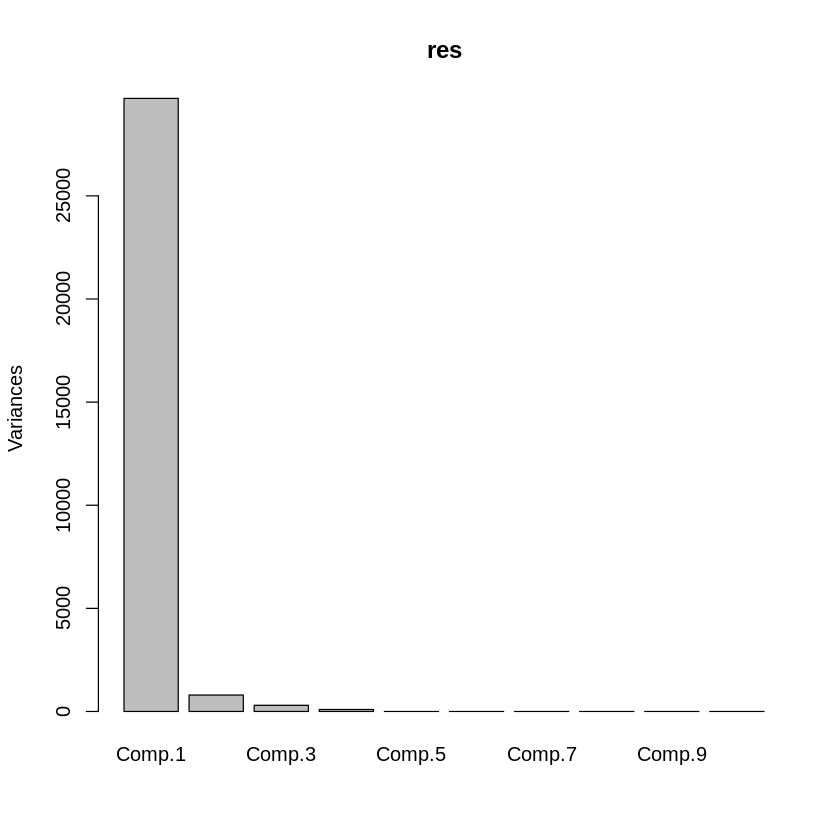

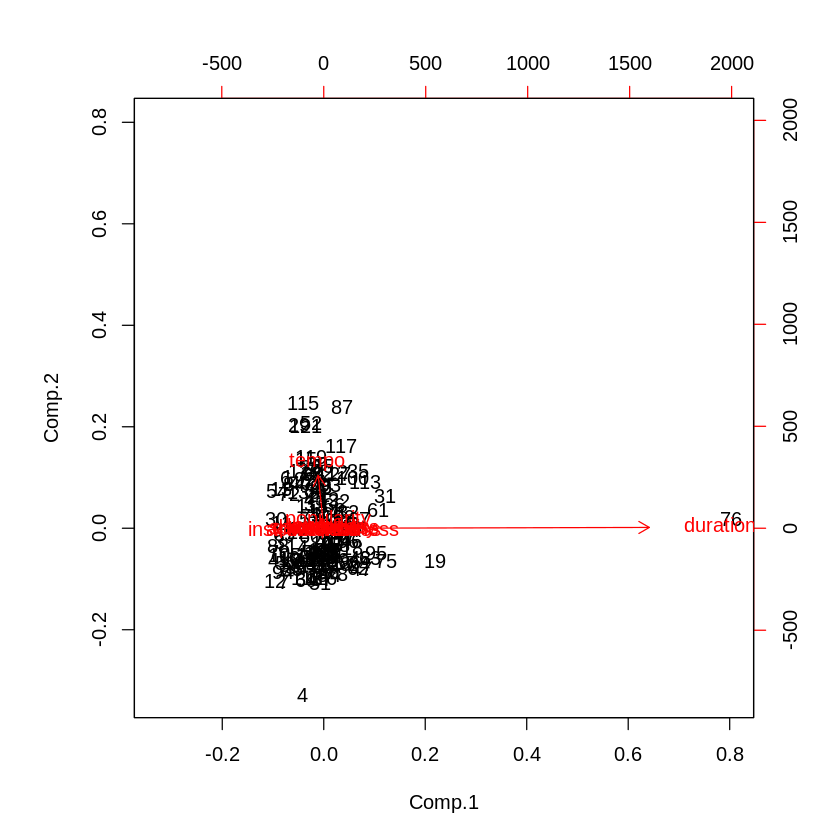

In [37]:
res <- princomp(datos)
plot(res)
summary(res)

biplot(res)

   popularity       acousticness      danceability       duration_s       
 Min.   :-2.3204   Min.   :-1.3902   Min.   :-1.8856   Min.   :-1.730351  
 1st Qu.:-0.6113   1st Qu.:-1.2455   1st Qu.:-0.6422   1st Qu.:-0.596003  
 Median : 0.1294   Median : 0.4148   Median :-0.1210   Median : 0.000899  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.000000  
 3rd Qu.: 0.7561   3rd Qu.: 0.9946   3rd Qu.: 0.6154   3rd Qu.: 0.495014  
 Max.   : 1.8955   Max.   : 1.0262   Max.   : 2.6264   Max.   : 4.359085  
     energy        instrumentalness     liveness           loudness      
 Min.   :-1.2380   Min.   :-1.0834   Min.   :-0.80375   Min.   :-2.8820  
 1st Qu.:-0.9746   1st Qu.:-1.0784   1st Qu.:-0.50517   1st Qu.:-0.6601  
 Median :-0.1749   Median :-0.2374   Median :-0.40255   Median : 0.2802  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.8754   3rd Qu.: 1.1127   3rd Qu.:-0.05828   3rd Qu.: 0.7708  
 Max.   : 1.9718   Max.   : 1.2

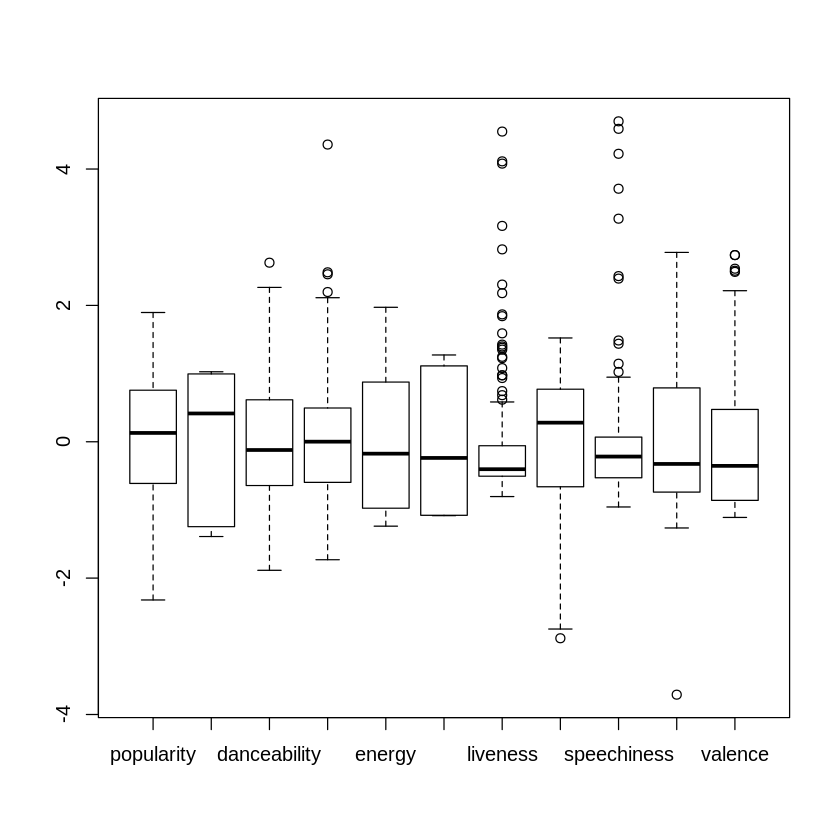

Importance of components:
                         Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.836307 1.1224749 1.0771777 1.0344701 1.02090041
Proportion of Variance 0.308870 0.1154086 0.1062820 0.0980214 0.09546667
Cumulative Proportion  0.308870 0.4242787 0.5305607 0.6285821 0.72404872
                          Comp.6     Comp.7    Comp.8    Comp.9   Comp.10
Standard deviation     0.9644451 0.88002658 0.7198847 0.6758821 0.4785851
Proportion of Variance 0.0852001 0.07093762 0.0474691 0.0418434 0.0209799
Cumulative Proportion  0.8092488 0.88018644 0.9276555 0.9694989 0.9904788
                           Comp.11
Standard deviation     0.322405582
Proportion of Variance 0.009521166
Cumulative Proportion  1.000000000

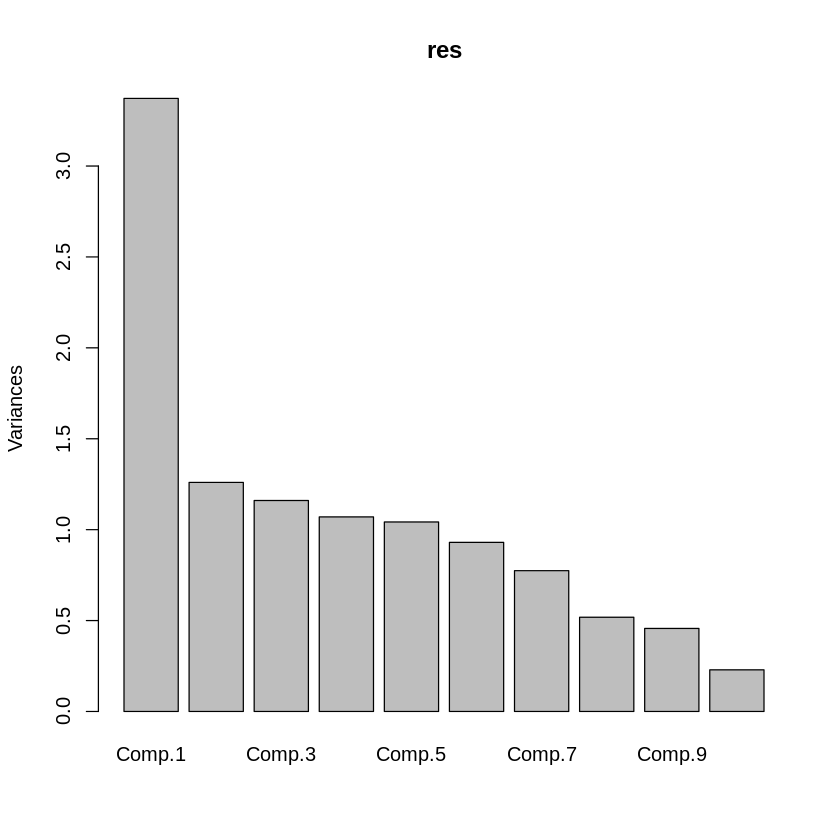

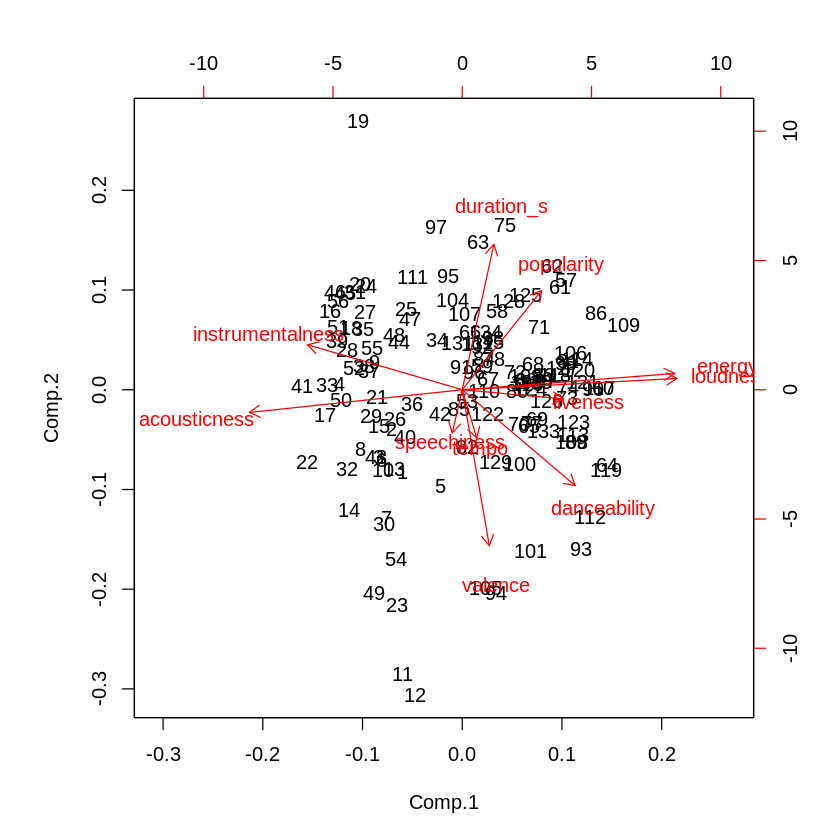

In [38]:
##eliminando outlier y escalando datos
datos <- datos[-76,]
datos<- scale(datos)
summary(datos)
boxplot(datos)

res <- princomp(datos)
plot(res)
summary(res)

biplot(res)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

corrplot 0.92 loaded



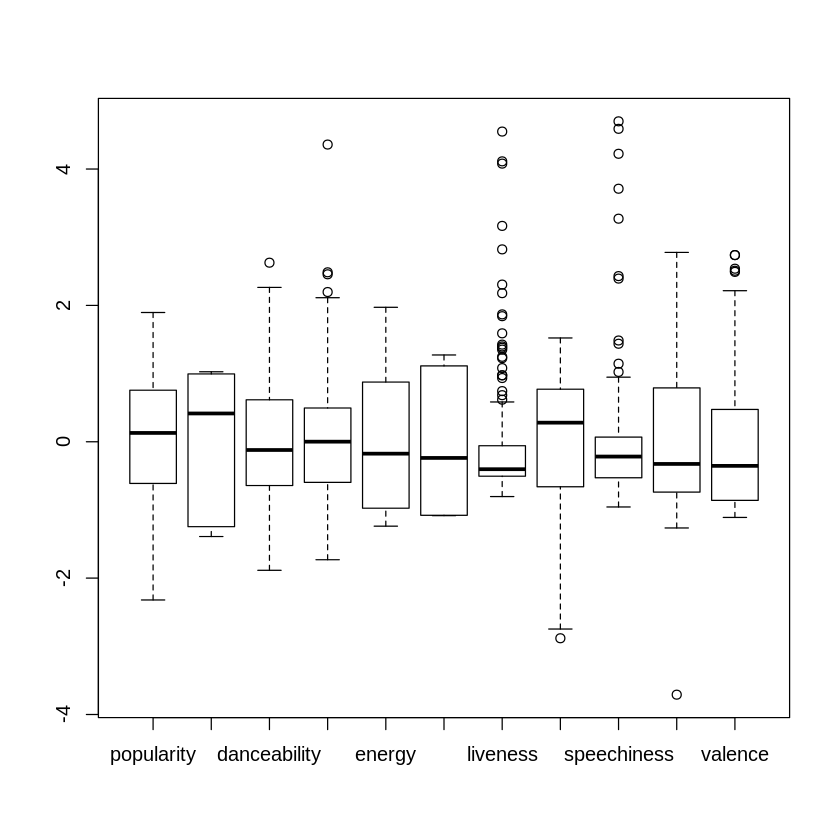

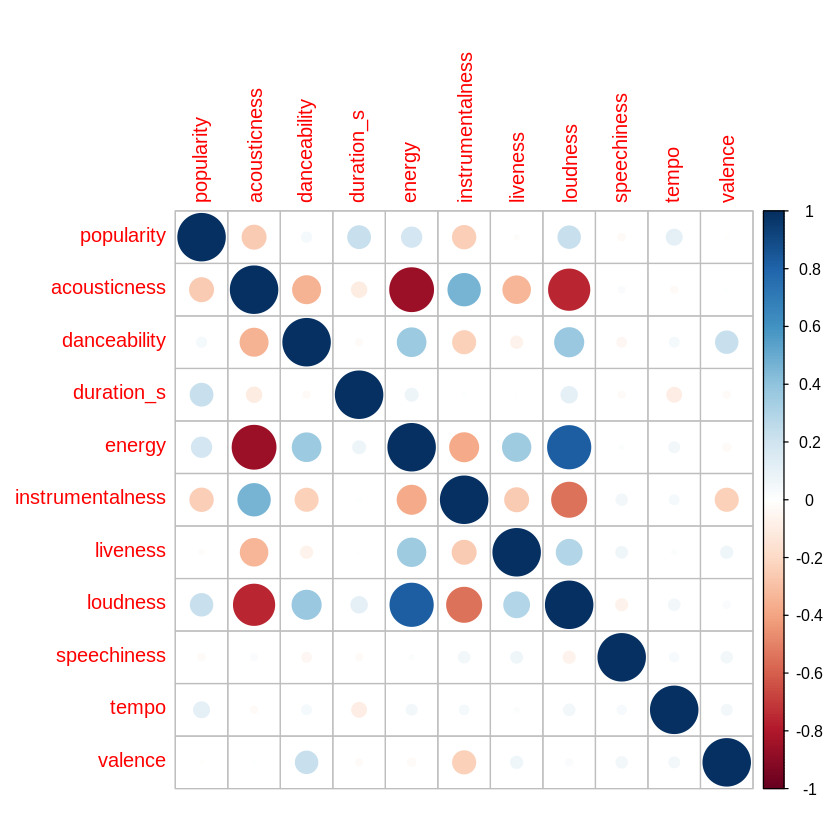

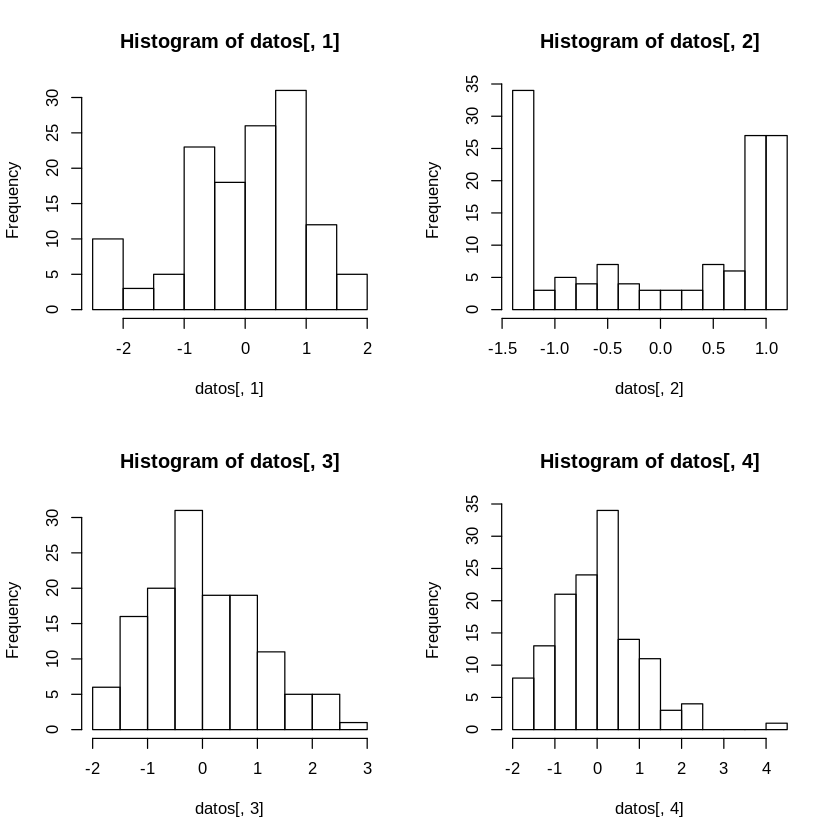

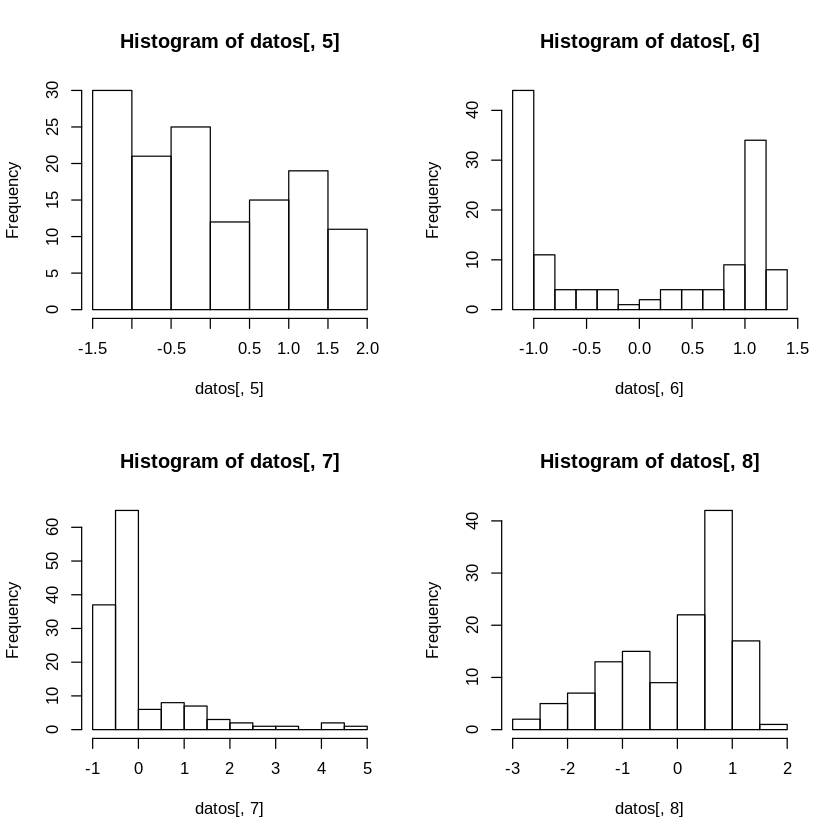

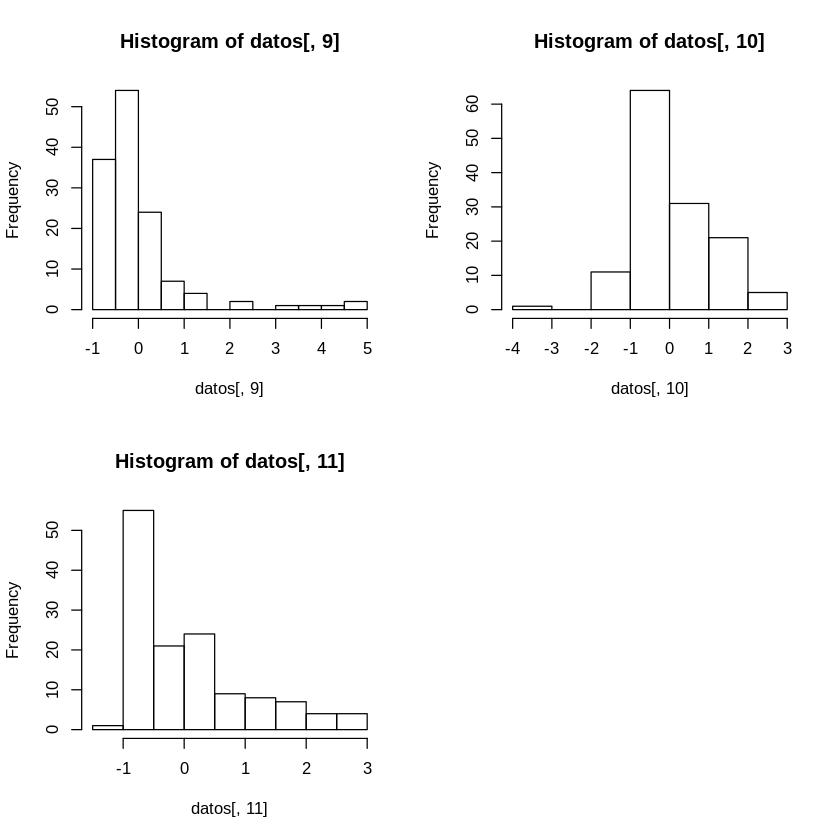

In [39]:
install.packages("corrplot")
library(corrplot)
boxplot(datos)
corrplot(cor(datos))
par(mfrow=c(2,2))
hist(datos[,1])
hist(datos[,2])
hist(datos[,3])
hist(datos[,4])
hist(datos[,5])
hist(datos[,6])
hist(datos[,7])
hist(datos[,8])
hist(datos[,9])
hist(datos[,10])
hist(datos[,11])

(i) Los datos consideran 11 variables de características de las canciones que debieran permitir discriminar a que género corresponden. De la inspección visual de los datos iniciales se observa que estos En las celdas anteriores se encuentran los análisis solicitados.

(ii) De acuerdo al resumen estadístico, los gráficos de caja y el PCA en la variable "duration_s" se observa un outlier, por lo que se procede a eliminar la observación 76. La categoría de outlier se ve corroborada con el PCA que muestra como un punto aislado a la observación 76 en la proyección de componentes principales.  Además, se observan  diferencias en las escalas de las distintas variables, por lo que se realiza escalamiento de los datos. 

En cuanto a las correlaciones, la mayor correlación positiva se presenta entre "loudness" y "energy" y las mayores correlaciones negativas entre "acousticness" y "energy" y "loudness".

Respecto a la hipótesis de normalidad, la inspección visual de los boxplot e histogramas evidencia que todas las variables tienen un comportamiento normal o posiblemente mezcla de normales. 

**Pregunta 2. (3 puntos)** 

**(i)** Escoja un método de agrupamiento que estime es adecuado para tratar estos datos. En particular, explique las principales características del método considerado y justifique su elección. 

**(ii)** Desarrolle los agrupamientos correspondientes explicando como escogió los valores de los parámetros utilizados. Itere si es necesario.

**(iii)** Grafique sus resultados utilizando una proyección de los datos en el primer plano de componentes principales. Interprete sus resultados.



**Respuesta Pregunta 2**
(i) De acuerdo al análisis exploratorio parece razonable utilizar GMM como algoritmo de agrupamiento. En efecto, 
este modelo supone que los datos provienen de un proceso generador de datos del tipo Mezcla de Gaussianas, en que cada grupo corresponde a una ditrsibución Gaussiana distinta. Se asume que existe una variable latente que indica el grupo a que pertenece cada observación. Se utiliza el algoritmo EM para obtener un agrupamiento óptimo.  Permite grupos no esféricos y es robusto. 
En este caso, vamos a considerar el cálculo de BIC para determinar el modelo preciso. El número de grupos debe ser 3, considerando que buscamos agrupar de acuerdo al género de las canciones y en la muestra se presentan 3 géneros musicales.


---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EVI (diagonal, equal volume, varying shape) model with 3 components: 

 log-likelihood   n df       BIC       ICL
      -1627.026 133 66 -3576.815 -3583.887

Clustering table:
 1  2  3 
53 42 38 

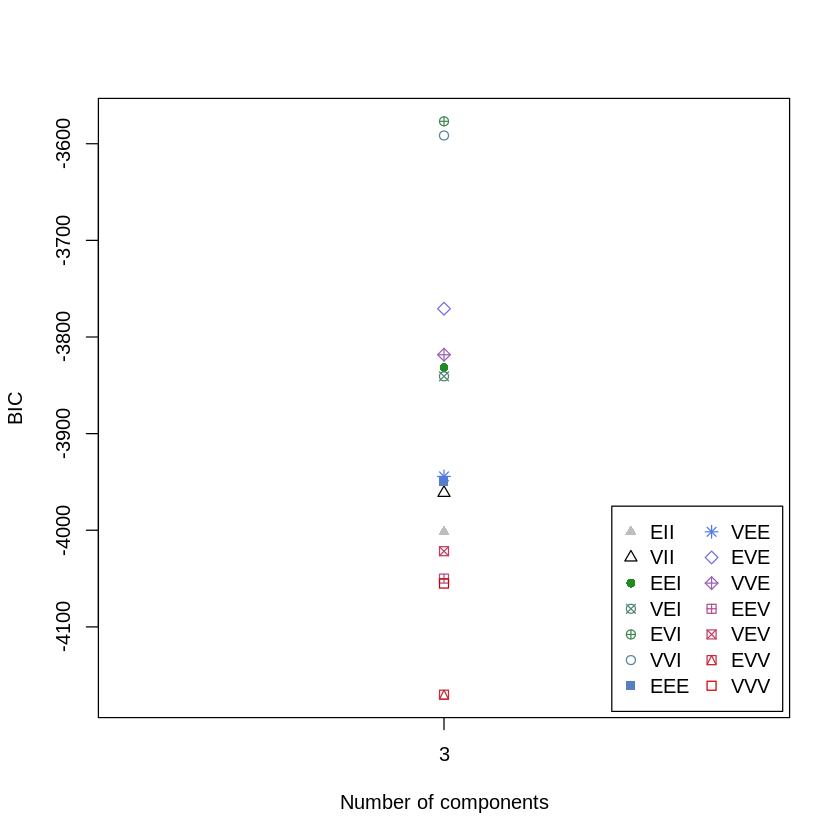

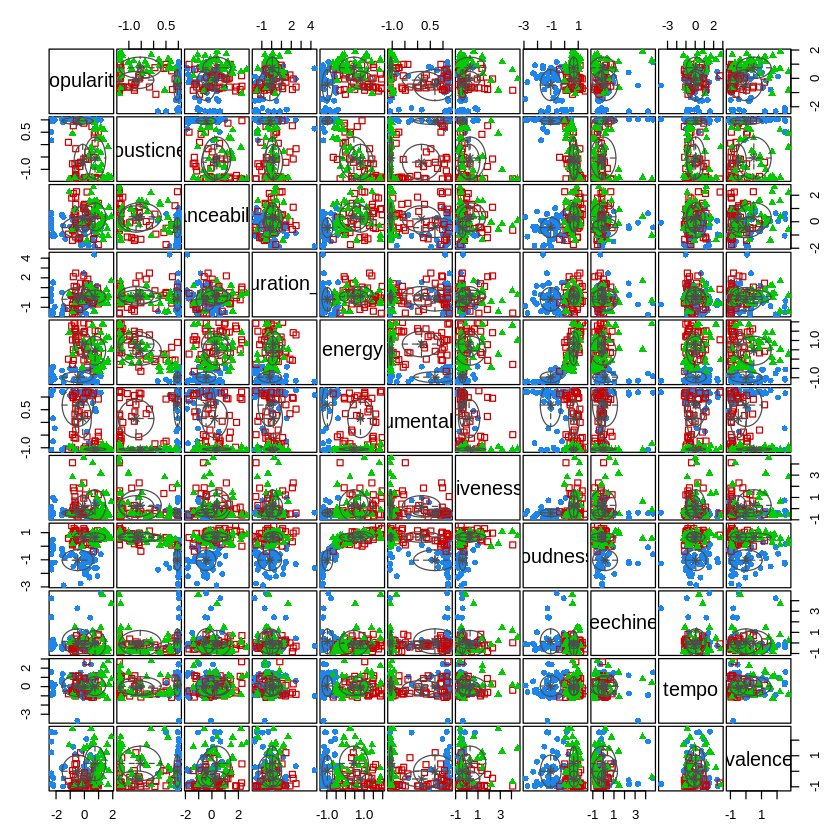

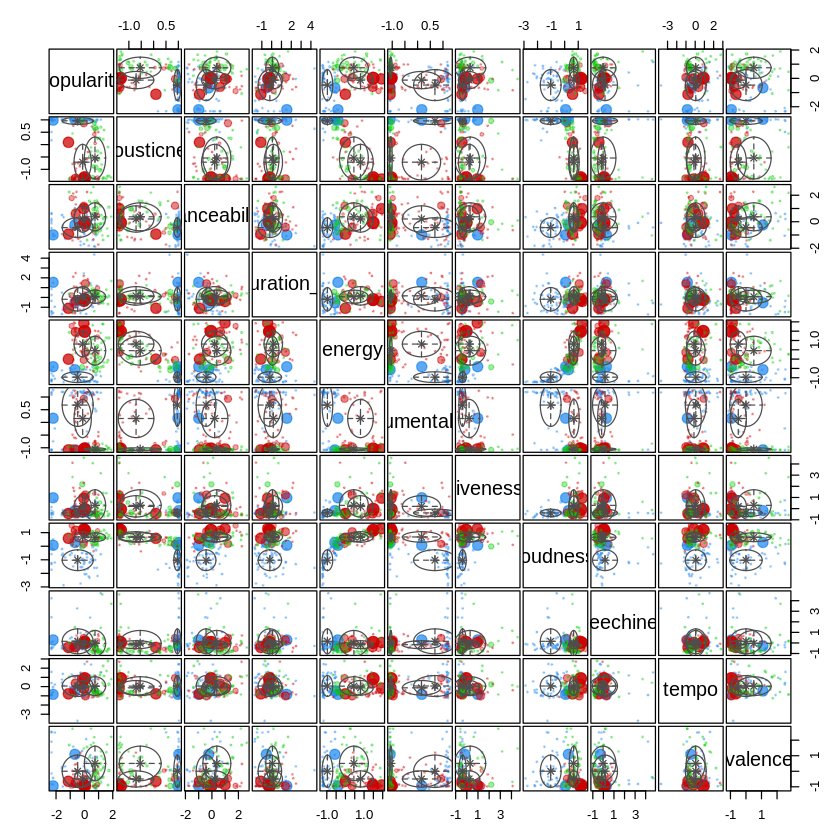

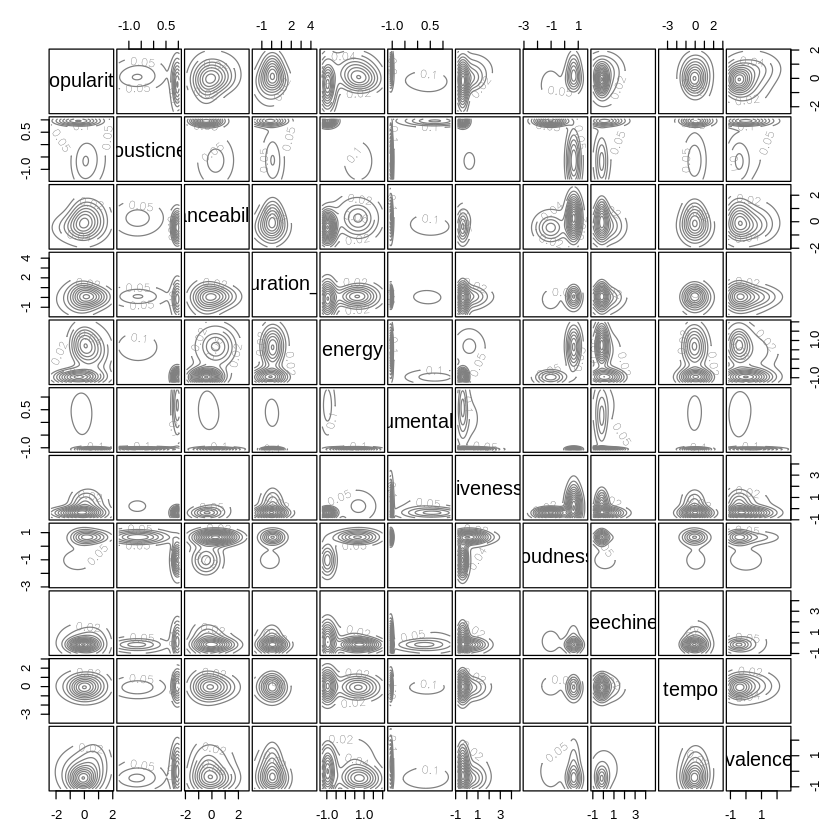

In [40]:
## (ii)
## se realiza el agrupamientp considerando 3 grupos, dado por el contexto
library(mclust)
clus <-Mclust(datos,G=3)
summary(clus)
plot(clus)

  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   1   1   1   1   1   1   1   1   2   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   2   1   1   1   1   1   1   1   1   1   1   3   1   1   1   2   2   2   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  77  78  79  80  81 
  2   2   2   3   2   2   2   3   3   2   2   2   2   2   2   2   2   2   2   2 
 82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 
  2   2   2   2   2   2   2   2   2   2   2   3   3   2   3   2   2   2   3   3 
102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 
  3   3   3   3   3   3   3   3   3   2   3   3   3   3   3   3   3   3   3   3 
122 123 124 125 126 127 128 

Importance of components:
                         Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.836307 1.1224749 1.0771777 1.0344701 1.02090041
Proportion of Variance 0.308870 0.1154086 0.1062820 0.0980214 0.09546667
Cumulative Proportion  0.308870 0.4242787 0.5305607 0.6285821 0.72404872
                          Comp.6     Comp.7    Comp.8    Comp.9   Comp.10
Standard deviation     0.9644451 0.88002658 0.7198847 0.6758821 0.4785851
Proportion of Variance 0.0852001 0.07093762 0.0474691 0.0418434 0.0209799
Cumulative Proportion  0.8092488 0.88018644 0.9276555 0.9694989 0.9904788
                           Comp.11
Standard deviation     0.322405582
Proportion of Variance 0.009521166
Cumulative Proportion  1.000000000

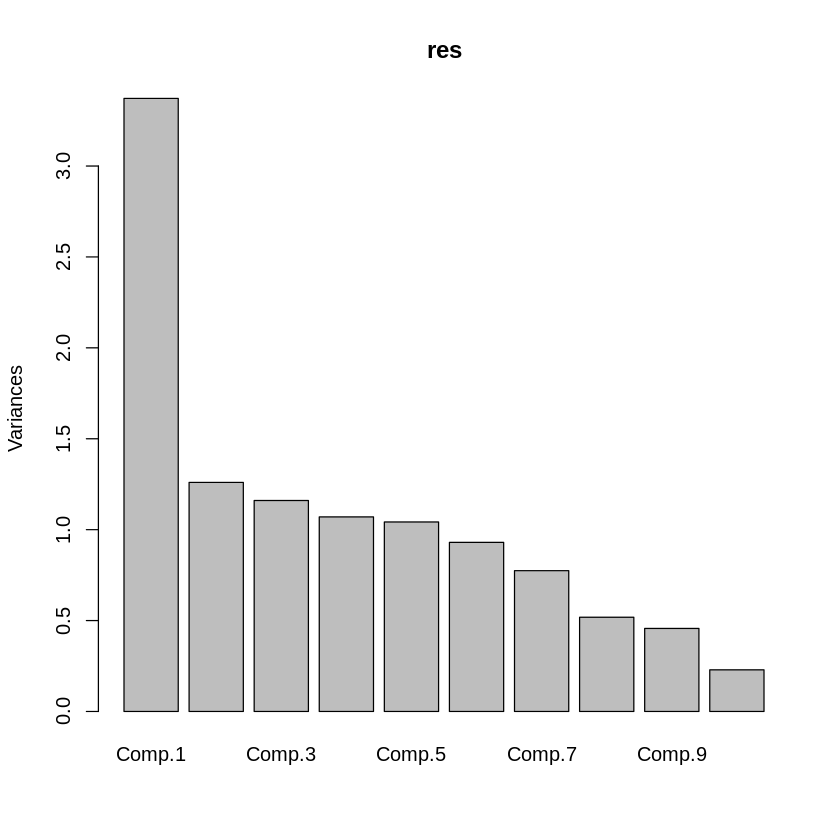

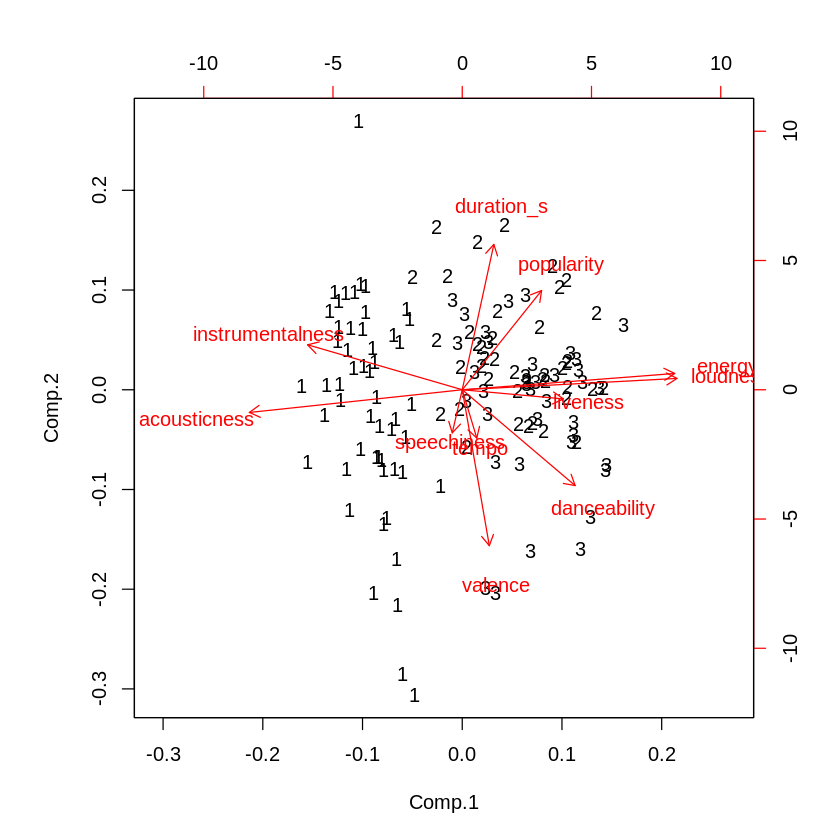

In [41]:
#(iii) 
cl <- clus$classification
print(cl)
centers <- t(clus$parameters$mean)
res <- princomp(datos)
plot(res)
summary(res)

biplot(res,xlabs=cl)


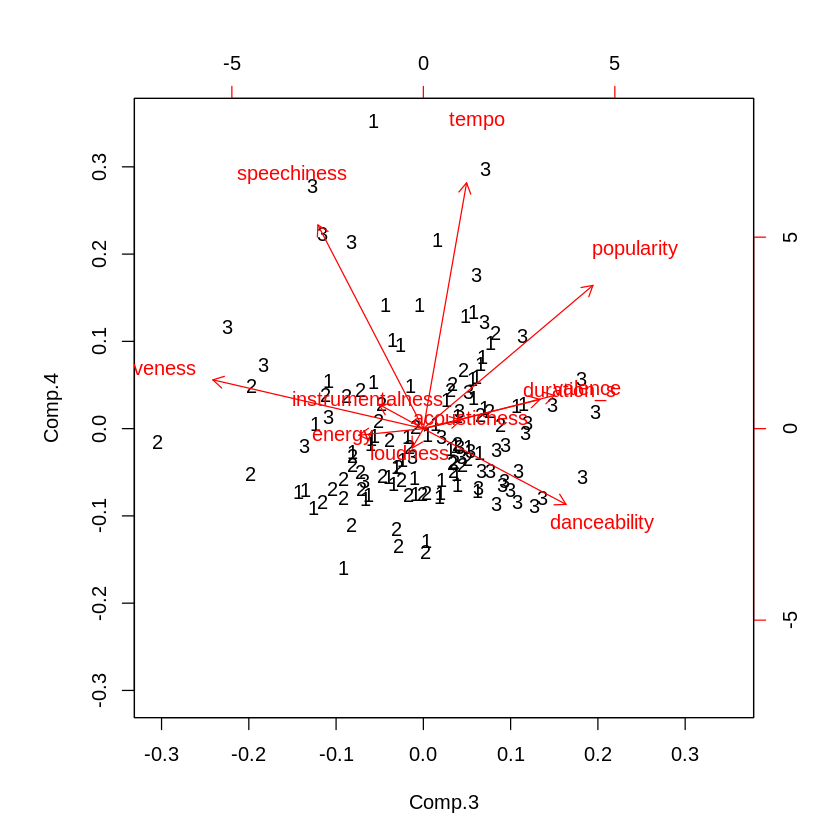

In [42]:
biplot(res,xlabs=cl,choices=3:4)

(iii) El primer plano principal representa el 44,3% de la varianza (32.7% asociada a la primera componente) por lo que no es completamente representativo de los datos. Se puede ver que ambos ejes aportan a distinguir los 3 grupos. El grupo 1 se distingue de los demás grupos por sus mayores valores de "acousticness" y "instrumentalness", mientras que el grupo 2 se caracteriza por mayores valores de "liveness". Por último el grupo 3 se caracteriza por mayores valores de "valence" y "danceability". Se graficó además los datos y variables en el plano del 3er y 4to ejes principales, sin encontrar nuevos elementos de discriminación de los grupos.

**Pregunta 3. La medida Purity** 

Esta es una medida útil para cuantificar la calidad del agrupamiento cuando se conoce la clase de cada observación.

Sea $N_{ij}$ el número de observaciones en el cluster $i$ que pertenecen a la clase $j$ y $N_i = \sum_{j=1}^{C} N_{ij}$  el número total de elementos del cluster $i$. Se define $p_{ij} = \frac{N_{ij}}{N_i}$ la probabilidad empírica de la clase $j$ en el cluster $i$. Se denomina **Purity** del cluster $i$ a:
$$p_i = \max_{j= 1,\cdots, C} p_{ij}$$
y la **Purity** del agrupamiento completo:
$$\text{Purity} = \sum_{i} \frac{N_i}{N} p_i$$
El rango de Purity es $[0,1]$ y cuanto mas cercano a $1$ es mejor el agrupamiento (mas cercano a las clases).

Utilice la medida Purity para establecer la calidad del agrupamiento respecto de su capacidad para predecir el género (clase) de las canciones. Realice una conclusión general de sus resultados.

In [43]:
#implementación de Purity
ClusterPurity <- function(clusters, classes) {
  sum(apply(table(classes, clusters), 2, max)) / length(clusters)
}

In [44]:
print(table(cl,datos0[-76]))

   
cl  Classical Electronic Rock
  1        53          0    0
  2         2         33    7
  3         1          5   32


In [22]:
## Calculo de medida de calidad del agrupamiento
print(ClusterPurity(cl,datos0[-76]))

[1] 0.887218


**Respuesta Pregunta 3**
De acuerdo a la tabla de contingencia, las mayores confusiones se encuentran en la discriminación de los géneros Rock y Electronic. Ninguna de las canciones de estos géneros es clasificada como música clásica, pero hay una confusión de 12 canciones entre estos dos géneros (7 piezas de Rock clasificadas como Electronic y 5 piezas de Electronic clasificadas como Rock). Por otra parte 3 piezas de música clásica son mal clasificadas como Rock (2) o Electronic (1).

El coeficiente de Purity es 0.887, lo cual nos dice que el agrupamiento es de muy  buena calidad.